# Machine Learning EDA Project (Retail Store)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('RetailStoreData.xlsx')

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


##### One thing notice from above df.decribe is that the min price is negative . and negative value not in use so i will drop negative values.

In [6]:
df[df['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


##### there are only 3 negative price rows.. i will delete them.

In [7]:
df = df.drop(df[df['Price']<0].index)

In [8]:
df[df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


##### into the dataset negative quantity doen't signify anything. So, i will delete them.

In [9]:
df = df.drop(df[df['Quantity']<0].index)

##### Checking Duplicate rows in data

In [10]:
#Find duplicates
df[df.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
523258,538035,20728,LUNCH BAG CARS BLUE,3,2010-12-09 13:03:00,1.65,16065.0,United Kingdom
523356,538051,22659,LUNCH BOX I LOVE LONDON,2,2010-12-09 13:24:00,1.95,18041.0,United Kingdom
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,2010-12-09 16:52:00,2.10,16907.0,United Kingdom
525293,538166,21915,RED HARMONICA IN BOX,5,2010-12-09 18:09:00,1.25,17965.0,United Kingdom


##### total 6841 duplicate rows so i will drop them

In [11]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(506291, 8)

##### there was clean duplicate rows

In [13]:
# No duplicates left
df[df.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


##### check info again

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506291 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      506291 non-null  object        
 1   StockCode    506291 non-null  object        
 2   Description  505190 non-null  object        
 3   Quantity     506291 non-null  int64         
 4   InvoiceDate  506291 non-null  datetime64[ns]
 5   Price        506291 non-null  float64       
 6   Customer ID  400947 non-null  float64       
 7   Country      506291 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.8+ MB


##### there was some missing values in Description & CustomerID

In [15]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1101
Quantity            0
InvoiceDate         0
Price               0
Customer ID    105344
Country             0
dtype: int64

##### 
Description      1101

Customer ID    105344

In [16]:
print('NULL values in description:',df['Description'].isnull().sum())

NULL values in description: 1101


In [17]:
df[(df['Description'].isnull()) & (df['Customer ID'].isnull()) & (df['Price']==0.0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
6378,489882,35751C,NaN,12,2009-12-02 16:22:00,0.0,NaN,United Kingdom
6555,489898,79323G,NaN,954,2009-12-03 09:40:00,0.0,NaN,United Kingdom
6581,489903,21166,NaN,48,2009-12-03 09:57:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524728,538142,84247C,NaN,1,2010-12-09 15:58:00,0.0,NaN,United Kingdom
524729,538144,90042B,NaN,1,2010-12-09 15:58:00,0.0,NaN,United Kingdom
524730,538141,22218,NaN,2,2010-12-09 15:58:00,0.0,NaN,United Kingdom
524731,538143,84534B,NaN,1,2010-12-09 15:58:00,0.0,NaN,United Kingdom


##### there was 1101 rows have NO Description, Price=0 & Customer ID='NaN'. So, these rows are not useful to me. i will delete these rows.

In [18]:
df = df.drop(df[(df['Description'].isnull()) & (df['Customer ID'].isnull()) & (df['Price']==0.0)].index)

In [19]:
# All types of Country
df['Country'].value_counts()

United Kingdom          467052
EIRE                      9451
Germany                   7652
France                    5514
Netherlands               2729
Spain                     1228
Switzerland               1170
Portugal                  1058
Belgium                   1037
Sweden                     886
Channel Islands            821
Italy                      708
Australia                  630
Cyprus                     533
Austria                    524
Greece                     512
Denmark                    418
United Arab Emirates       399
Norway                     365
Finland                    347
Unspecified                306
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
RSA                        110
Bahrain                    106
Canada                      77
Thailand                    76
Hong Kong                   74
Israel  

In [20]:
# number of unique customers after removing Nan values
len(df['Customer ID'].dropna().unique())

4314

##### there are 4314 Customers coming to the Retail store

In [21]:
min(df['InvoiceDate'])

Timestamp('2009-12-01 07:45:00')

In [22]:
max(df['InvoiceDate'])

Timestamp('2010-12-09 20:01:00')

##### 
This is a 4314 unique Customers data of almost 1 year from 1st Dec 2009 to 09th Dec 2010.

Let's try to Segment Customers according to country

In [23]:
cust_by_country=df[['Customer ID','Country']].dropna().drop_duplicates().groupby('Country').count()

In [24]:
cust_by_country.sort_values(by='Customer ID',ascending=False,inplace=True)

In [25]:
label=cust_by_country.sort_values(by='Customer ID',ascending=False).index

In [26]:
label.values

array(['United Kingdom', 'Germany', 'France', 'Spain', 'Netherlands',
       'Portugal', 'Belgium', 'Sweden', 'Australia', 'Switzerland',
       'Channel Islands', 'Italy', 'Austria', 'Denmark', 'Finland',
       'Cyprus', 'USA', 'Japan', 'Norway', 'EIRE', 'Greece',
       'Unspecified', 'United Arab Emirates', 'Poland', 'Korea', 'Israel',
       'Bahrain', 'Thailand', 'Brazil', 'Canada', 'Iceland', 'RSA',
       'Lithuania', 'Malta', 'Singapore', 'Nigeria', 'West Indies'],
      dtype=object)

In [27]:
cust_by_country

,Customer ID
Country,
United Kingdom,3971
Germany,67
France,47
Spain,25
Netherlands,22
Portugal,18
Belgium,17
Sweden,16
Australia,15


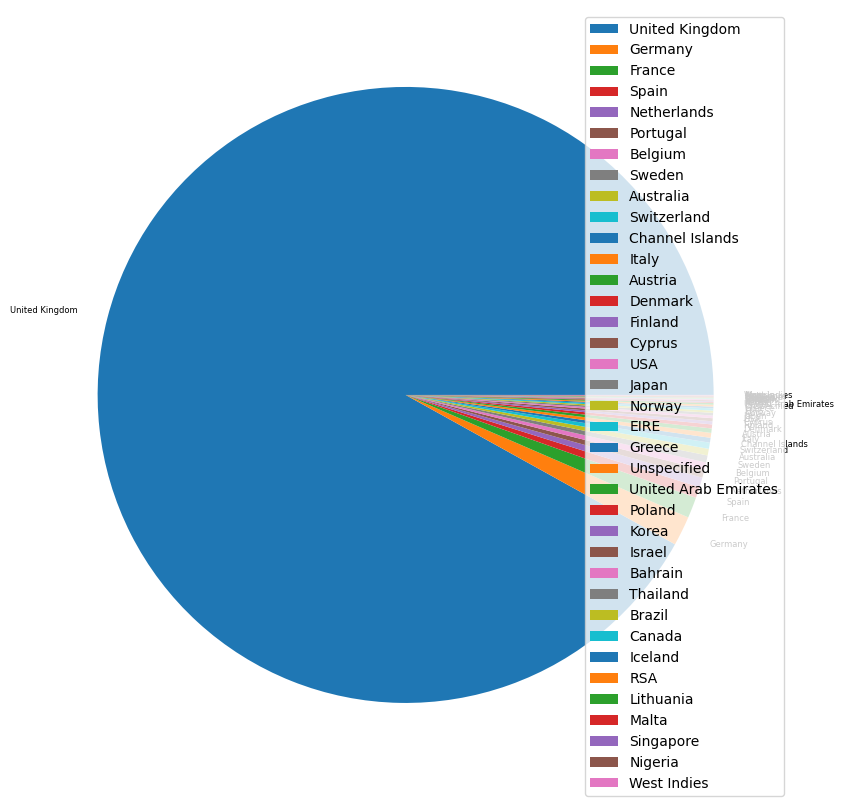

In [28]:
plt.figure(figsize=(10,10))
plt.pie(cust_by_country['Customer ID'],labels=label.values,textprops={'fontsize': 6});
plt.legend(loc='upper right')
plt.show()

##### 
This is a 4314 unique Customers data of almost 1 year from 1st Dec 2009 to 09th Dec 2010.

Majority of the customers is from United Kingdom.

What I got intuition from it is that either a store is situated in UK and some other countries people also live in UK so they are also customers that'why so less in numbers OR a store has its franchise in different countries but it's most popular in UK.

In [29]:
df.describe()

,Quantity,Price,Customer ID
count,505190.000000,505190.000000,400947.000000
mean,11.564956,4.270808,15361.454639
std,88.753421,64.064339,1680.669487
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13985.000000
50%,3.000000,2.100000,15311.000000
75%,12.000000,4.210000,16805.000000
max,19152.000000,25111.090000,18287.000000


In [30]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


### Segment Customers in (Rich, Middle class & Poor)


##### In 1 year of Span we will find the sum of Money spend by each Customer in Store and divide our Target Customers accordingly which can be a Enhancing Factor to which type of Customer we should Promote which type of Products

In [31]:
price_segm=df.groupby('Customer ID').sum().sort_values(by='Price',ascending=False)

In [32]:
price_segm.rename(columns={'Price':'Total Money spend by Customer'},inplace=True)

In [33]:
price_segm

,Quantity,Total Money spend by Customer
Customer ID,,
14911.0,69709,31560.54
14156.0,108105,18678.87
17841.0,14332,14943.25
15760.0,2,13916.34
14063.0,3850,13443.55
...,...,...
14900.0,48,0.29
14845.0,600,0.25
14033.0,576,0.19


##### Now, Let's assume some Thresholds according to data:
Customers who spend more then 3000 per year are Rich Customers.

Customers who spend more then 100 and less then 3000 per year are middile class Customers.

Customers who spend less then 100 per year are Poor customers

In [34]:
Rich_cust=price_segm[price_segm['Total Money spend by Customer']>3000]

In [35]:
Middile_cust=price_segm[((price_segm['Total Money spend by Customer']>100) & (price_segm['Total Money spend by Customer']<=3000))]

In [36]:
Poor_cust=price_segm[price_segm['Total Money spend by Customer']<=100]

In [37]:
print(f'Number of Rich Customers: {len(Rich_cust)}, Middile class customers: {len(Middile_cust)} & Poor Customer: {len(Poor_cust)} ')

Number of Rich Customers: 24, Middile class customers: 2537 & Poor Customer: 1753 


In [38]:
cust_division=np.array([len(Rich_cust),len(Middile_cust),len(Poor_cust)])
cust_label=np.array(['Rich','Middile Class', 'Poor'])

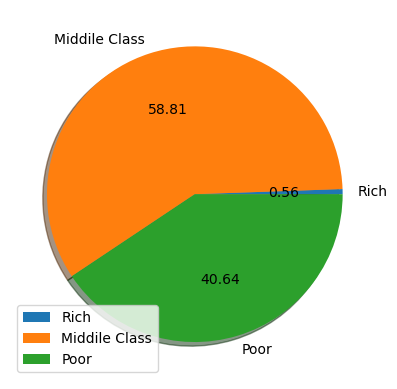

In [39]:
plt.pie(cust_division,labels=cust_label,shadow=True,autopct='%1.2f')
plt.legend()
plt.show()

### Loyal Customers

#### Loyal Customers can be defined as which shop on retail store on regular basis. Let's consider Customers who Purchase from store for Each Consecutive Month in a year are Loyal.

In [40]:
# Let's create a new column with month
df['Invoice_Month']= pd.DatetimeIndex(df['InvoiceDate']).month

In [41]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Invoice_Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,12
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,12
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,12
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,12


#### I will find the unique set of customerId in all month and take intersection of all IDs. Ids which have consecutively Purchased for all months are Loyal.

In [42]:
#unique Customers  ID who purchased in 1st month
Customer_id_month1=set(df[df['Invoice_Month']==1]['Customer ID'].dropna())
#unique Customers  ID who purchased in 2nd month
Customer_id_month2=set(df[df['Invoice_Month']==2]['Customer ID'].dropna())
#unique Customers  ID who purchased in 3rd month
Customer_id_month3=set(df[df['Invoice_Month']==3]['Customer ID'].dropna())
#unique Customers  ID who purchased in 4th monthd
Customer_id_month4=set(df[df['Invoice_Month']==4]['Customer ID'].dropna())  
#unique Customers  ID who purchased in 5th month
Customer_id_month5=set(df[df['Invoice_Month']==5]['Customer ID'].dropna()) 
#unique Customers  ID who purchased in 6th month
Customer_id_month6=set(df[df['Invoice_Month']==6]['Customer ID'].dropna())
#unique Customers  ID who purchased in 7th month
Customer_id_month7=set(df[df['Invoice_Month']==7]['Customer ID'].dropna())
#unique Customers  ID who purchased in 8th month
Customer_id_month8=set(df[df['Invoice_Month']==8]['Customer ID'].dropna())
#unique Customers  ID who purchased in 9th month
Customer_id_month9=set(df[df['Invoice_Month']==9]['Customer ID'].dropna())
#unique Customers  ID who purchased in 10th month
Customer_id_month10=set(df[df['Invoice_Month']==10]['Customer ID'].dropna()) 
#unique Customers  ID who purchased in 11th month
Customer_id_month11=set(df[df['Invoice_Month']==11]['Customer ID'].dropna())
#unique Customers  ID who purchased in 12th month
Customer_id_month12=set(df[df['Invoice_Month']==12]['Customer ID'].dropna())

In [43]:
# take intersection of all month Customer ID to find the loyal Customers
Loyal_Customer_ID=Customer_id_month1.intersection(Customer_id_month2,Customer_id_month3,Customer_id_month4,Customer_id_month5,Customer_id_month6,Customer_id_month7,Customer_id_month8,Customer_id_month9,Customer_id_month10,Customer_id_month11,Customer_id_month12)

In [44]:
len(Loyal_Customer_ID)

45

In [45]:
loyal_cc=np.array([len(Loyal_Customer_ID),len(df['Customer ID'].dropna().unique()) -len(Loyal_Customer_ID)])
loyal_label=np.array(['Loyal Customers','Non-Loyal Customers'])

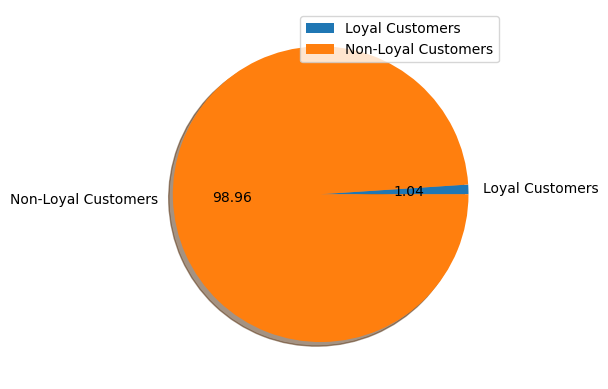

In [46]:
plt.pie(loyal_cc,labels=loyal_label,shadow=True,autopct='%1.2f')
plt.legend()
plt.show()

#### Most Popular Sales Time (Seasonability)

In [47]:
Month_wise_sales=df.groupby('Invoice_Month').sum()

In [48]:
del Month_wise_sales['Quantity']
del Month_wise_sales['Customer ID']

In [49]:
# Month wise sales in descending order
Month_wise_sales.sort_values(by='Price',ascending=False)

,Price
Invoice_Month,
12,296140.950
11,279615.732
10,242767.280
3,205447.521
6,184601.180
9,176566.711
4,143438.762
1,141115.072
5,130055.520


<Axes: title={'center': 'Month Wise Sales'}, xlabel='Invoice_Month', ylabel='Sales'>

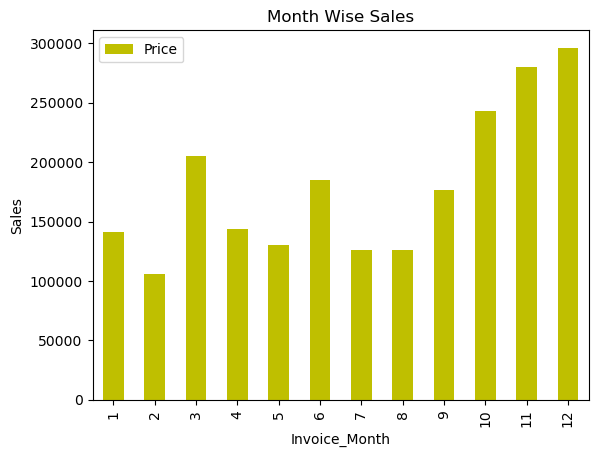

In [50]:
Month_wise_sales.plot(kind='bar',color='y',ylabel='Sales',title='Month Wise Sales')

#### 
Highest Sales of Store is in DECEMBER

Sales is low in month from Jan-Feb & then get a Sudden Jump in Months of March & June . After the Month of August Sales Continously Increases.


<Axes: title={'center': 'Day Wise Sales for 1 Complete year'}, xlabel='Day of Month', ylabel='Sales'>

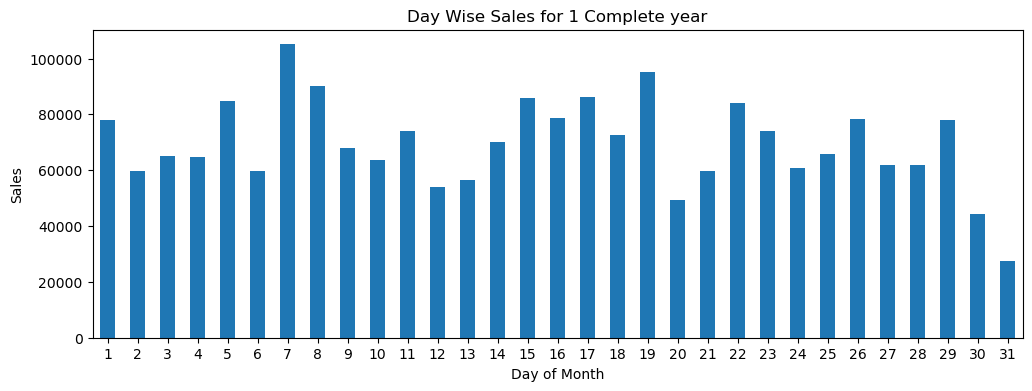

In [51]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df['InvoiceDate'].dt.day)["Price"].sum().plot(kind='bar', rot=0, ax=axs,xlabel='Day of Month',ylabel='Sales',title='Day Wise Sales for 1 Complete year')

#### There is no as such good pattern at the Day wise Sales.

<Axes: title={'center': 'Hours Wise Sales for 1 Complete year'}, xlabel='Opening hours of store', ylabel='Sales'>

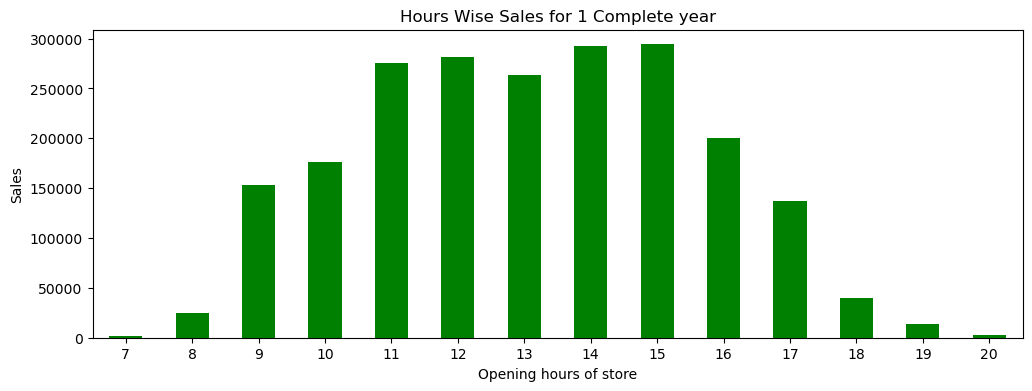

In [52]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df['InvoiceDate'].dt.hour)["Price"].sum().plot(kind='bar',color='g', rot=0, ax=axs,xlabel='Opening hours of store',ylabel='Sales',title='Hours Wise Sales for 1 Complete year')

##### From the Hourwise Sales it can be seen clearly that at the Mid of the day Sales get Higher